In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

In [80]:
df = pd.read_csv('dataBases/base_segundo_encontro.csv', encoding='latin-1', sep=';')
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [81]:
df.isnull().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

In [82]:
df.isna().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

In [83]:
x = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [6,7])], remainder='passthrough')

In [85]:
x = onehot.fit_transform(x)
x[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 112, 16, 6, 0, 45, 8],
      dtype=object)

In [86]:
x.shape

(1000, 13)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x = scaler.fit_transform(x)
x[0]

array([0.        , 0.        , 0.        , 2.25509671, 0.        ,
       2.1007708 , 0.        , 2.74186666, 2.82071876, 1.94214029,
       0.        , 3.13861033, 2.54707897])

In [88]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)
x_treinamento.shape, x_teste.shape

((750, 13), (250, 13))

In [89]:
from sklearn.svm import SVC

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kernel = ['rbf', 'linear', 'sigmoid', 'poly']
c = [1.0, 2.0]
MelhorAccuracy = 0
melhorC = 0.1
melhorK = ""

for i in kernel:
    for j in c:
        svm = SVC(kernel=i, C=j)
        svm.fit(x_treinamento, y_treinamento)

        previsoes = svm.predict(x_teste)
        accuracy = accuracy_score(y_teste, previsoes)

        if accuracy > MelhorAccuracy:
            MelhorAccuracy = accuracy
            melhorK = i
            melhorC = j

svm = SVC(kernel=melhorK, C=melhorC)
svm.fit(x_treinamento, y_treinamento)


,C,2.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [91]:
previsoes = svm.predict(x_teste)
previsoes

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

0.992

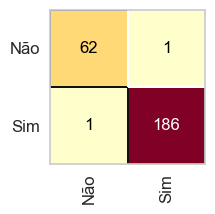

In [92]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [93]:
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [94]:
tempo = int(input("Quanto tempo de conversa (min): "))
risadas = int(input("seila risadas: "))
pontos = int(input("Quantidade de pontos em comum: "))
nivel_timidez = int(input("Nível de timidez (0, 10): "))
mensagem = int(input("Quantidade de mensagens antes: "))
iniciativa = int(input("Nível de iniciativa (0, 10): "))
local_encontro = input("Local de Encontro: ")
momento = input("Momento da vida: ")

dados = {'tempo_conversa_min': [tempo], 'risadas':[risadas], 'pontos_comuns':[pontos], 'nivel_timidez':[nivel_timidez], 'mensagens_antes':[mensagem], 'iniciativa_conversa':[iniciativa], 'local_encontro':[local_encontro], 'momento_da_vida':[momento]}

df_input = pd.DataFrame(dados)

df_input


,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida
0,30,30,5,5,30,5,Bar,Estressado


In [95]:
df_input = onehot.transform(df_input)
df_input = pd.DataFrame(df_input, columns=onehot.get_feature_names_out())
df_input

c:\Users\disrct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,OneHot__x6_Bar,OneHot__x6_Café,OneHot__x6_Parque,OneHot__x6_Restaurante,OneHot__x7_Cansado,OneHot__x7_Estressado,OneHot__x7_Estável,remainder__x0,remainder__x1,remainder__x2,remainder__x3,remainder__x4,remainder__x5
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,30.0,5.0,5.0,30.0,5.0


In [96]:
previsoes = svm.predict(df_input)

c:\Users\disrct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [99]:
print(f'Kernel usado: {melhorK}\nMelhor C usado: {melhorC}\nPrevisão: {previsoes}')

Kernel usado: linear
Melhor C usado: 2.0
Previsão: ['Sim']
